In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def nasa_pres(P, P0=101.29, T0=288.08):
    T = T0*((P / P0)**(1 / 5.256)) - 273.1
    h = (T-15.04)/(-0.00649)
    return h

def numerical_int(accel_xyz, tdata):
    '''
    This is jsut vanilla integration of whatever you give it, and integrates twice
    E.g. goes from acceleration to position
    
    accel_xyz is a 3x1 vector of all the accelerations in the XYZ for the rows
    '''
    
    ax_vn, ay_vn, az_vn = accel_xyz[0], accel_xyz[1], accel_xyz[2]

    vx_vn, vy_vn, vz_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    x_vn, y_vn, z_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    dt = tdata[1]

    vx_vn = integrate.cumtrapz(ax_vn, tdata, initial=0)
    vy_vn = integrate.cumtrapz(ay_vn, tdata, initial=0)
    vz_vn = integrate.cumtrapz(az_vn, tdata, initial=0)

    x_vn = integrate.cumtrapz(vx_vn, tdata, initial=0)
    y_vn = integrate.cumtrapz(vy_vn, tdata, initial=0)
    z_vn = integrate.cumtrapz(vz_vn, tdata, initial=0)
    
    v_vec = [vx_vn, vy_vn, vz_vn]
    x_vec = [x_vn, y_vn, z_vn]
    
    return v_vec, x_vec

In [3]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../../Data/DropTest1.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]

L = tdata.shape[0]

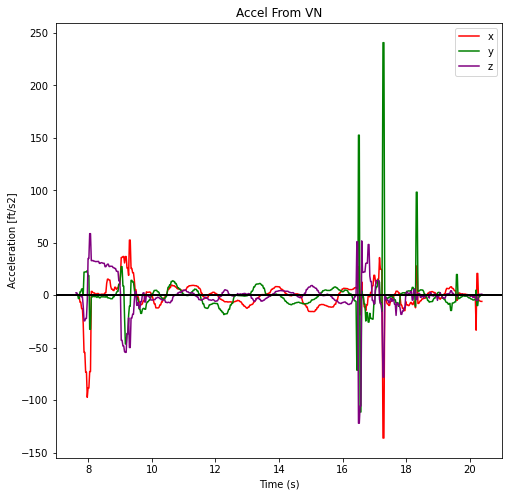

In [4]:
start = 300
limit = 800

ax_vn = df['LinearAccelNed X'][start:limit] * ft
ay_vn = df['LinearAccelNed Y'][start:limit] * -ft
az_vn = df['LinearAccelNed Z'][start:limit] * ft
short_time = tdata[start:limit]

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(short_time, ax_vn, color='red', label='x')
l3 = ax.plot(short_time, ay_vn, color='green', label='y')
l4 = ax.plot(short_time, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s2]")
ax.legend()
plt.show()

In [19]:
accel_xyz = [ax_vn, ay_vn, az_vn]
v_vec, x_vec = numerical_int(accel_xyz, short_time)

vx_vn, vy_vn, vz_vn = v_vec[0], v_vec[1], v_vec[2]
x_vn, y_vn, z_vn = x_vec[0], x_vec[1], x_vec[2]

P = df['Pres'][start:limit]
v_NASA_pres = np.vectorize(nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft + 332
#T0 really was 303.3966... this would've been biased by the RPi tho

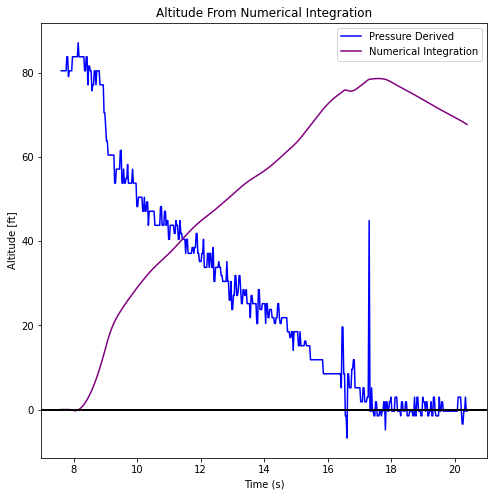

In [20]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(short_time, altitude_NASA_pres, color='blue', label='Pressure Derived')
l4 = ax.plot(short_time, z_vn, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()

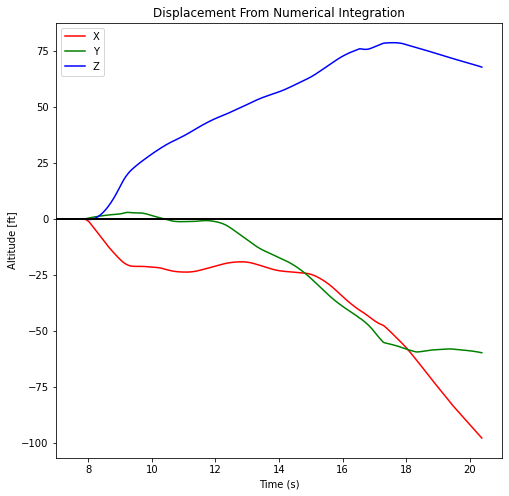

In [22]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l4 = ax.plot(short_time, x_vn, color='red', label='X')
l4 = ax.plot(short_time, y_vn, color='green', label='Y')
l4 = ax.plot(short_time, z_vn, color='blue', label='Z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Displacement From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()